In [1]:
import numpy as np
from DS_detector import scan_pix, scan_none
from DS_Planck_Unet import unet_planck
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from DS_healpix_fragmentation import one_pixel_fragmentation, matr2dict, draw_circles_h
import pandas as pd
from DS_data_transformation import draw_df

In [2]:
model = unet_planck(
    weights='/home/rt2122/Models/planck_z/f8.ep0078-vl0.015431-l0.016983.h5')

In [42]:
thr_list = [0.05 * i for i in range(20, 0, -1)]

In [13]:
#res6 = scan_none(6, model, thr_list=[0.1], ret_coords=True)

res6 = scan_pix('/home/rt2122/Data/clusters/planck_z.csv', model, 6,
                       thr_list=[0.1], step=16, min_dist=15/60)

/home/rt2122/L/git/data-segmentation-2/modules/DS_detector.py:56: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  thr_dict[thr].extend(list(matrs[i][[new_cen[:, 0], new_cen[:, 1]]]))
/home/rt2122/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
res6[0]

,tp,tn,fp,fn,thr,pix2
0,39,1001,4179,1,0.1,6


In [19]:
matr = one_pixel_fragmentation(2, 6, 10)

In [20]:
mdict = matr2dict(matr)

In [21]:
tp_pic = draw_circles_h(res6[1]['RA'], res6[1]['DEC'], 
                        np.ones(len(res6[1])), 2048, mdict, 
                        list(matr.shape)+[1]) 

In [22]:
plt.matshow(p_pic[:,:,0])

NameError: name 'p_pic' is not defined

In [18]:
len(res6['fp'])

334

In [23]:
planck_z = pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv')

In [24]:
p_pic = draw_circles_h(planck_z['RA'], planck_z['DEC'], 
                        np.ones(len(planck_z)), 2048, mdict, 
                        list(matr.shape)+[1], coef=0.02) 

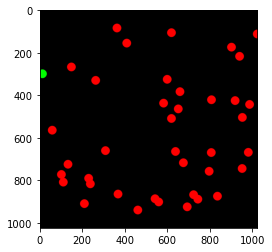

In [25]:
plt.imshow(np.dstack([tp_pic, p_pic - tp_pic, np.zeros_like(tp_pic)]) * 255)

In [26]:
res6 = scan_none(6, model, thr_list=[0.1], ret_coords=True)

/home/rt2122/L/git/data-segmentation-2/modules/DS_detector.py:56: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  thr_dict[thr].extend(list(matrs[i][[new_cen[:, 0], new_cen[:, 1]]]))
/home/rt2122/L/git/data-segmentation-2/modules/DS_detector.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['all_found'][i] = len(thr_dict[thr])
/home/rt2122/L/git/data-segmentation-2/modules/DS_detector.py:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [28]:
tp_pic = draw_circles_h(res6['planck_z']['RA'], res6['planck_z']['DEC'], 
                        np.ones(len(res6['planck_z'])), 2048, mdict, 
                        list(matr.shape)+[1]) 
fp_pic = draw_circles_h(res6['fp']['RA'], res6['fp']['DEC'], 
                        np.ones(len(res6['fp'])), 2048, mdict, 
                        list(matr.shape)+[1], coef=0.01) 

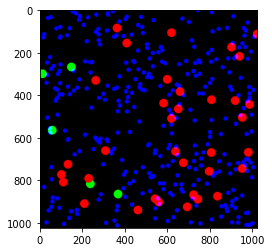

In [29]:
plt.imshow(np.dstack([tp_pic, p_pic - tp_pic, fp_pic]) * 255)

In [43]:
res6 = scan_none(6, model, thr_list=thr_list, ret_coords=False)

/home/rt2122/L/git/data-segmentation-2/modules/DS_detector.py:56: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  thr_dict[thr].extend(list(matrs[i][[new_cen[:, 0], new_cen[:, 1]]]))
/home/rt2122/L/git/data-segmentation-2/modules/DS_detector.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['all_found'][i] = len(thr_dict[thr])
/home/rt2122/L/git/data-segmentation-2/modules/DS_detector.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [73]:
pd.DataFrame({'fp':res6['fp'], 'thr':thr_list})

,fp,thr
0,0,1.00
1,0,0.95
2,1,0.90
3,2,0.85
4,2,0.80
5,4,0.75
6,6,0.70
7,10,0.65
8,14,0.60
9,19,0.55


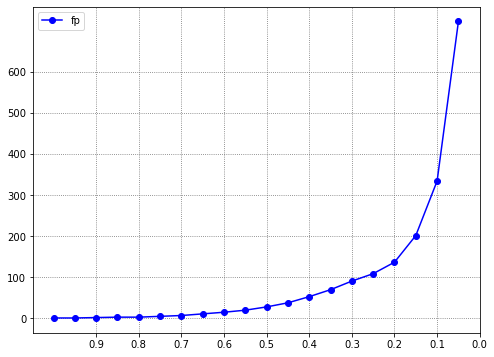

In [75]:
draw_df_new(res6, {'fp':res6['fp']}, thr_list, grids=True, xgrid=np.arange(0,1,0.1),
           ygrid=np.arange(0,700,100))

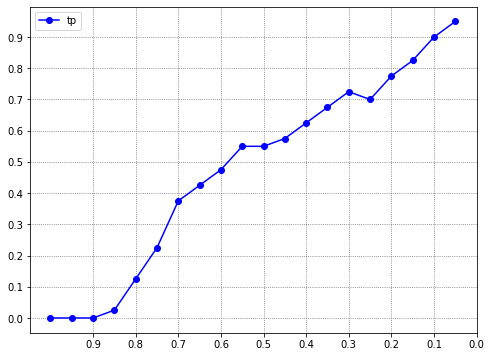

In [77]:
draw_df_new(res6, {'tp':res6['tp_pz'] / 
                   (res6['tp_pz']+res6['fn_pz'])}, thr_list, xgrid=np.arange(0,1,0.1),
           ygrid=np.arange(0,1,0.1))

In [74]:
def draw_df_new(df, data, base, figsize=(8, 6), grids=True, xgrid=None, ygrid=None):
    from matplotlib import pyplot as plt
    import numpy as np
    fig, ax = plt.subplots(1, figsize=figsize)
    colors = 'bgrcmykw'
    plt.gca().invert_xaxis()
    max_y = 0
    min_y = 100
    for c, label in zip(colors[:len(data)], data):
        line, = ax.plot(base, data[label], c+'o-')
        line.set_label(label)
        max_y = max(max_y, max(data[label]))
        min_y = min(min_y, min(data[label]))
    ax.legend()
    if grids:
        if xgrid is None:
            ax.set_xticks(base)
        else:
            ax.set_xticks(xgrid)
            
        if ygrid is None:
            ax.set_yticks(np.arange(min_y, max_y, (max_y-min_y) / 10))
        else:
            ax.set_yticks(ygrid)
        #ax.grid(True)
        plt.grid(b=True, which='major', color='#666666', linestyle=':')
    plt.show()


In [30]:
res6 = scan_pix('/home/rt2122/Data/clusters/planck_z.csv', model, 6,
                       thr_list=thr_list, step=16, min_dist=15/60)

KeyboardInterrupt: 